<a href="https://colab.research.google.com/github/sfreagin/testing_colab_link/blob/main/4Geeks_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
main_df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv")

In [ ]:
main_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(main_df, random_state=42)


In [ ]:
main_df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337
bmi_mean,1


In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)

train_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
693,24,23.655,0,2352.96845,True,False,True,False,False
1297,28,26.510,2,4340.44090,False,False,False,True,False
634,51,39.700,1,9391.34600,True,False,False,False,True
1022,47,36.080,1,42211.13820,True,True,False,True,False
178,46,28.900,2,8823.27900,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,4561.18850,False,False,False,False,False
1130,39,23.870,5,8582.30230,False,False,False,True,False
1294,58,25.175,0,11931.12525,True,False,False,False,False
860,37,47.600,2,46113.51100,False,True,False,False,True


In [ ]:
# there are NO null values in this dataset
train_df.isna().sum()

,0
age,0
bmi,0
children,0
charges,0
sex_male,0
smoker_yes,0
region_northwest,0
region_southeast,0
region_southwest,0


In [ ]:
X_train = train_df.drop(columns=['charges'])

y_train = train_df['charges']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_model = LinearRegression()

linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_preds = linreg_model.predict(X_train)

Text(0, 0.5, 'Predicted charges')

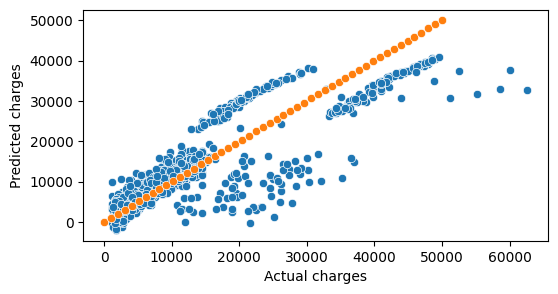

In [ ]:
#let's take a look at a scatterplot for the predictions vs actual values
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_train, y = train_preds)
sns.scatterplot(x=np.linspace(0,50000), y=np.linspace(0,50000))

plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")

Text(0, 0.5, 'Predicted charges')

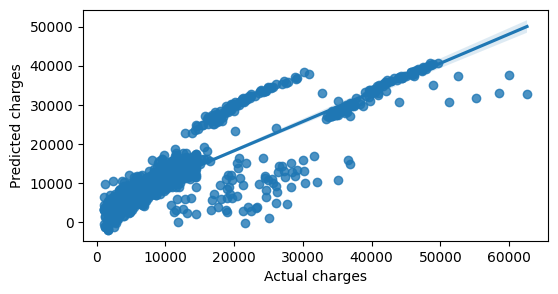

In [ ]:
#let's take a look at a scatterplot for the predictions vs actual values
plt.figure(figsize=(6,3))
sns.regplot(x = y_train, y = train_preds)
#sns.scatterplot(x=np.linspace(0,50000), y=np.linspace(0,50000))

plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")

<Axes: xlabel='charges', ylabel='Count'>

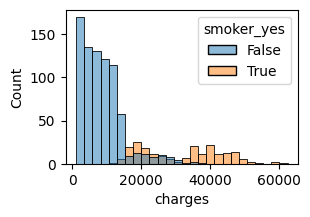

In [ ]:
plt.figure(figsize=(3,2))
sns.histplot(x=y_train, hue=train_df['smoker_yes'])

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [ ]:
print('ON THE TRAINING DATASET:')
print(f"Mean Absolute error: {round(mean_absolute_error(y_true = y_train, y_pred = train_preds))}")
print(f"Root Mean Squared error: {round(root_mean_squared_error(y_true = y_train, y_pred = train_preds))}")
print(f"R^2 score: {round(r2_score(y_true = y_train, y_pred=train_preds), 4)}")

ON THE TRAINING DATASET:
Mean Absolute error: 4183
Root Mean Squared error: 6083
R^2 score: 0.745


In [ ]:
train_residuals = train_preds - y_train

Text(0.5, 0, 'Residuals from prediction')

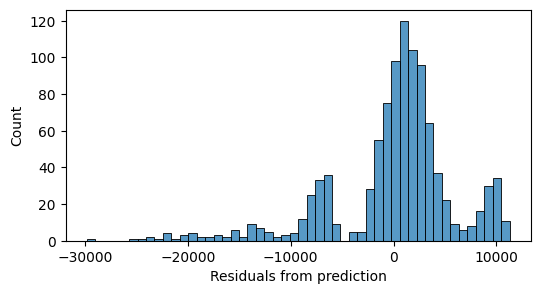

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(x=train_residuals)
plt.xlabel("Residuals from prediction")

In [ ]:
temp_residuals = train_residuals.reset_index(drop=True)

<Axes: xlabel='None', ylabel='charges'>

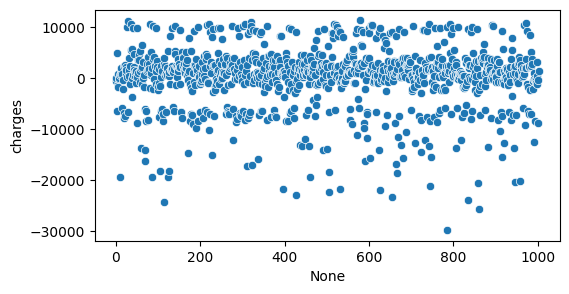

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(x = temp_residuals.index, y = temp_residuals)
#plt.xlim(502,528)

(0.0, 50000.0)

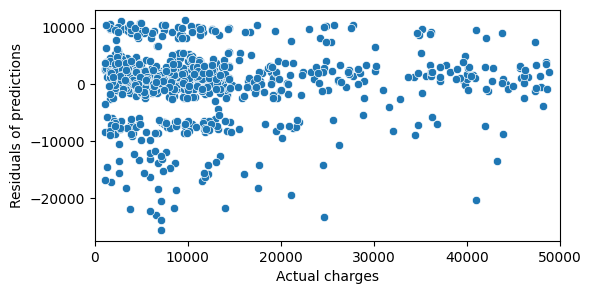

In [ ]:
plt.figure(figsize = (6,3))
sns.scatterplot(x = y_train, y = temp_residuals)
plt.xlabel("Actual charges")
plt.ylabel("Residuals of predictions")
plt.xlim(0,50000)

## Let's do the same thing for our test data!

In [ ]:
X_test = test_df.drop(columns=['charges'])
y_test = test_df['charges']

In [ ]:
X_train.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
693,24,23.655,0,True,False,True,False,False
1297,28,26.510,2,False,False,False,True,False
634,51,39.700,1,True,False,False,False,True


In [ ]:
X_test = pd.get_dummies(X_test)

In [ ]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,True,False,True,False,True,False,False,False
887,36,30.020,0,True,False,True,False,False,True,False,False
890,64,26.885,0,True,False,False,True,False,True,False,False
1293,46,25.745,3,False,True,True,False,False,True,False,False
259,19,31.920,0,False,True,False,True,False,True,False,False


In [ ]:
X_test = X_test[X_train.columns]

In [ ]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25.175,2,False,False,False,False,False
887,36,30.020,0,False,False,True,False,False
890,64,26.885,0,False,True,True,False,False
1293,46,25.745,3,True,False,True,False,False
259,19,31.920,0,True,True,True,False,False
...,...,...,...,...,...,...,...,...
342,60,27.550,0,False,False,False,False,False
308,58,34.865,0,True,False,False,False,False
1128,34,32.800,1,True,False,False,False,True
503,19,30.250,0,True,True,False,True,False


In [ ]:
test_preds = linreg_model.predict(X_test)

Text(0, 0.5, 'Predicted charges (test dataset)')

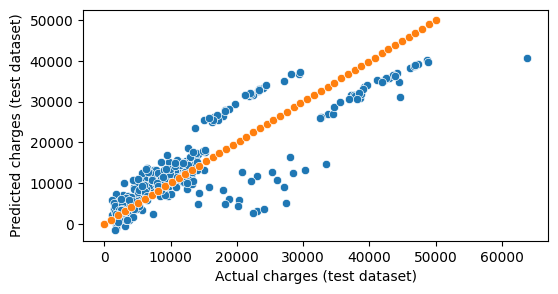

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_test, y = test_preds)
sns.scatterplot(x=np.linspace(0,50000), y=np.linspace(0,50000))

plt.xlabel("Actual charges (test dataset)")
plt.ylabel("Predicted charges (test dataset)")

In [ ]:
print('ON THE TESTING DATASET:')
print(f"Mean Absolute error: {round(mean_absolute_error(y_true = y_test, y_pred = test_preds))}")
print(f"Root Mean Squared error: {round(root_mean_squared_error(y_true = y_test, y_pred = test_preds))}")
print(f"R^2 score: {round(r2_score(y_true = y_test, y_pred = test_preds), 4)}")

ON THE TESTING DATASET:
Mean Absolute error: 4244
Root Mean Squared error: 5926
R^2 score: 0.7673


In [ ]:
test_residuals = test_preds - y_test

<Axes: xlabel='charges', ylabel='Count'>

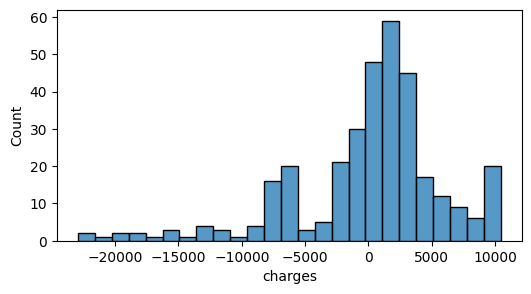

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(x=test_residuals)

Text(0, 0.5, 'Prediction residuals')

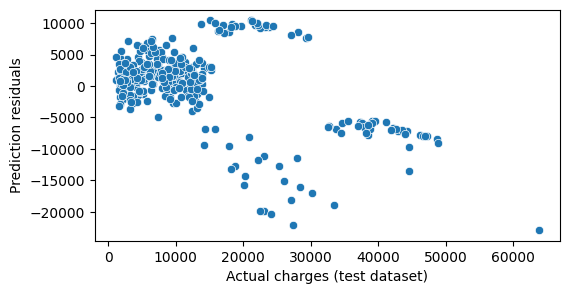

In [ ]:
plt.figure(figsize = (6,3))
sns.scatterplot(x= y_test, y = test_residuals)

plt.xlabel("Actual charges (test dataset)")
plt.ylabel("Prediction residuals")

In [ ]:
linreg_model.coef_

array([  259.62363309,   339.80503104,   426.50272274,    45.62242749,
       23630.3989903 ,  -355.14862133,  -781.36838892,  -860.26671223])

In [ ]:
round(pd.DataFrame(linreg_model.coef_, linreg_model.feature_names_in_).reset_index())

,index,0
0,age,260.0
1,bmi,340.0
2,children,427.0
3,sex_male,46.0
4,smoker_yes,23630.0
5,region_northwest,-355.0
6,region_southeast,-781.0
7,region_southwest,-860.0


In [ ]:
X_train.mean() * linreg_model.coef_

,0
age,10191.586546
bmi,10368.056235
children,471.151562
sex_male,23.015901
smoker_yes,4853.302285
region_northwest,-87.105245
region_southeast,-201.769105
region_southwest,-211.850327


In [ ]:
main_df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<Axes: >

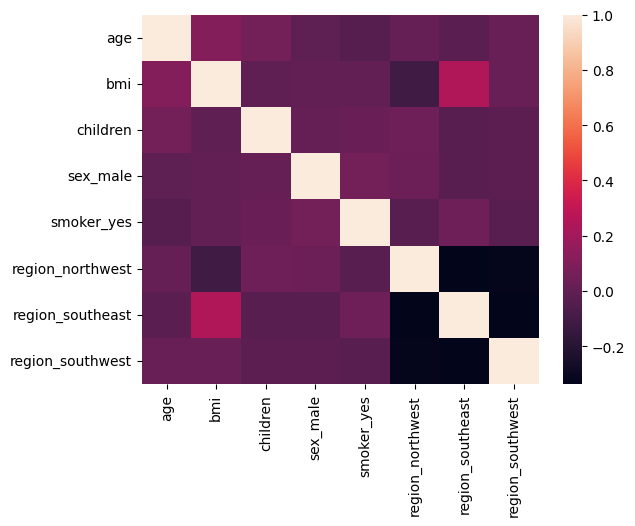

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
np.corrcoef(X_train['bmi'], y_train)

array([[1.        , 0.19582832],
       [0.19582832, 1.        ]])

<Axes: >

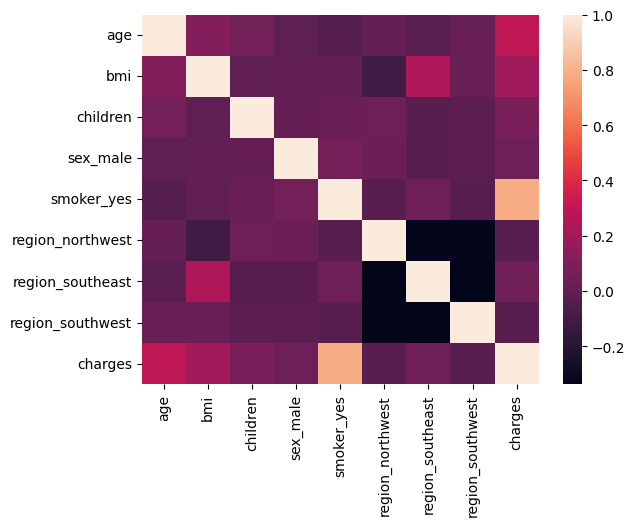

In [ ]:
temp_df = X_train.copy()
temp_df['charges'] = y_train

sns.heatmap(temp_df.corr())